In [1]:
import pandas as pd


train_meta = pd.read_csv('data/training_set_metadata.csv')
train_lc = pd.read_csv('data/training_set.csv')
objects = set(train_meta['object_id'])

In [12]:
train_meta['target'].unique()

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53])

In [13]:
objects = set(train_meta.query('target == 88')['object_id'])

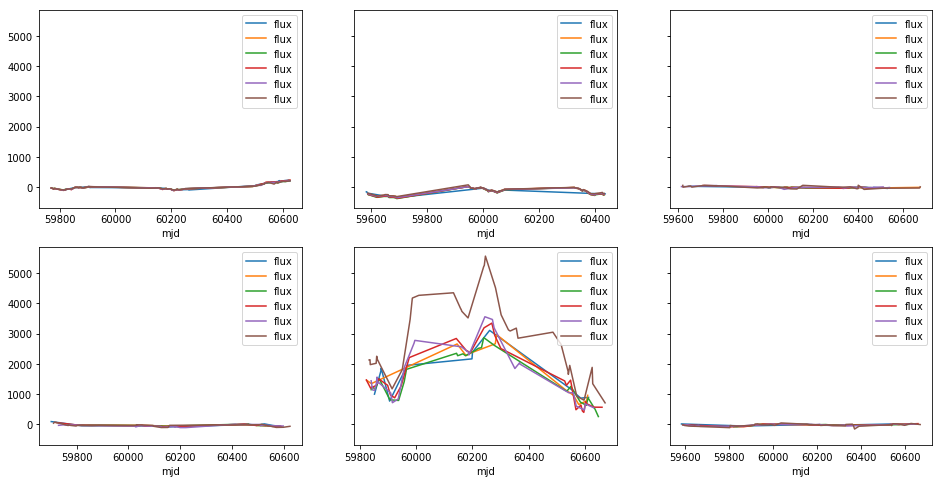

In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sample = random.sample(objects, 6)

gb = train_lc.query(f'object_id in {sample}')\
             .groupby('object_id')

n_cols = 3
nrows = int(np.ceil(gb.ngroups / n_cols))

f, axes = plt.subplots(nrows=nrows, ncols=n_cols, figsize=(16, 8), sharey=True)

for (key, ax) in zip(gb.groups.keys(), axes.flatten()):
    gb.get_group(key).groupby('passband').plot(x='mjd', y='flux', ax=ax)

ax.legend()
plt.show()

In [8]:
import scipy.fftpack as fft

pd.Series([x.real for x in fft.fft(tmp)]).plot()

NameError: name 'tmp' is not defined